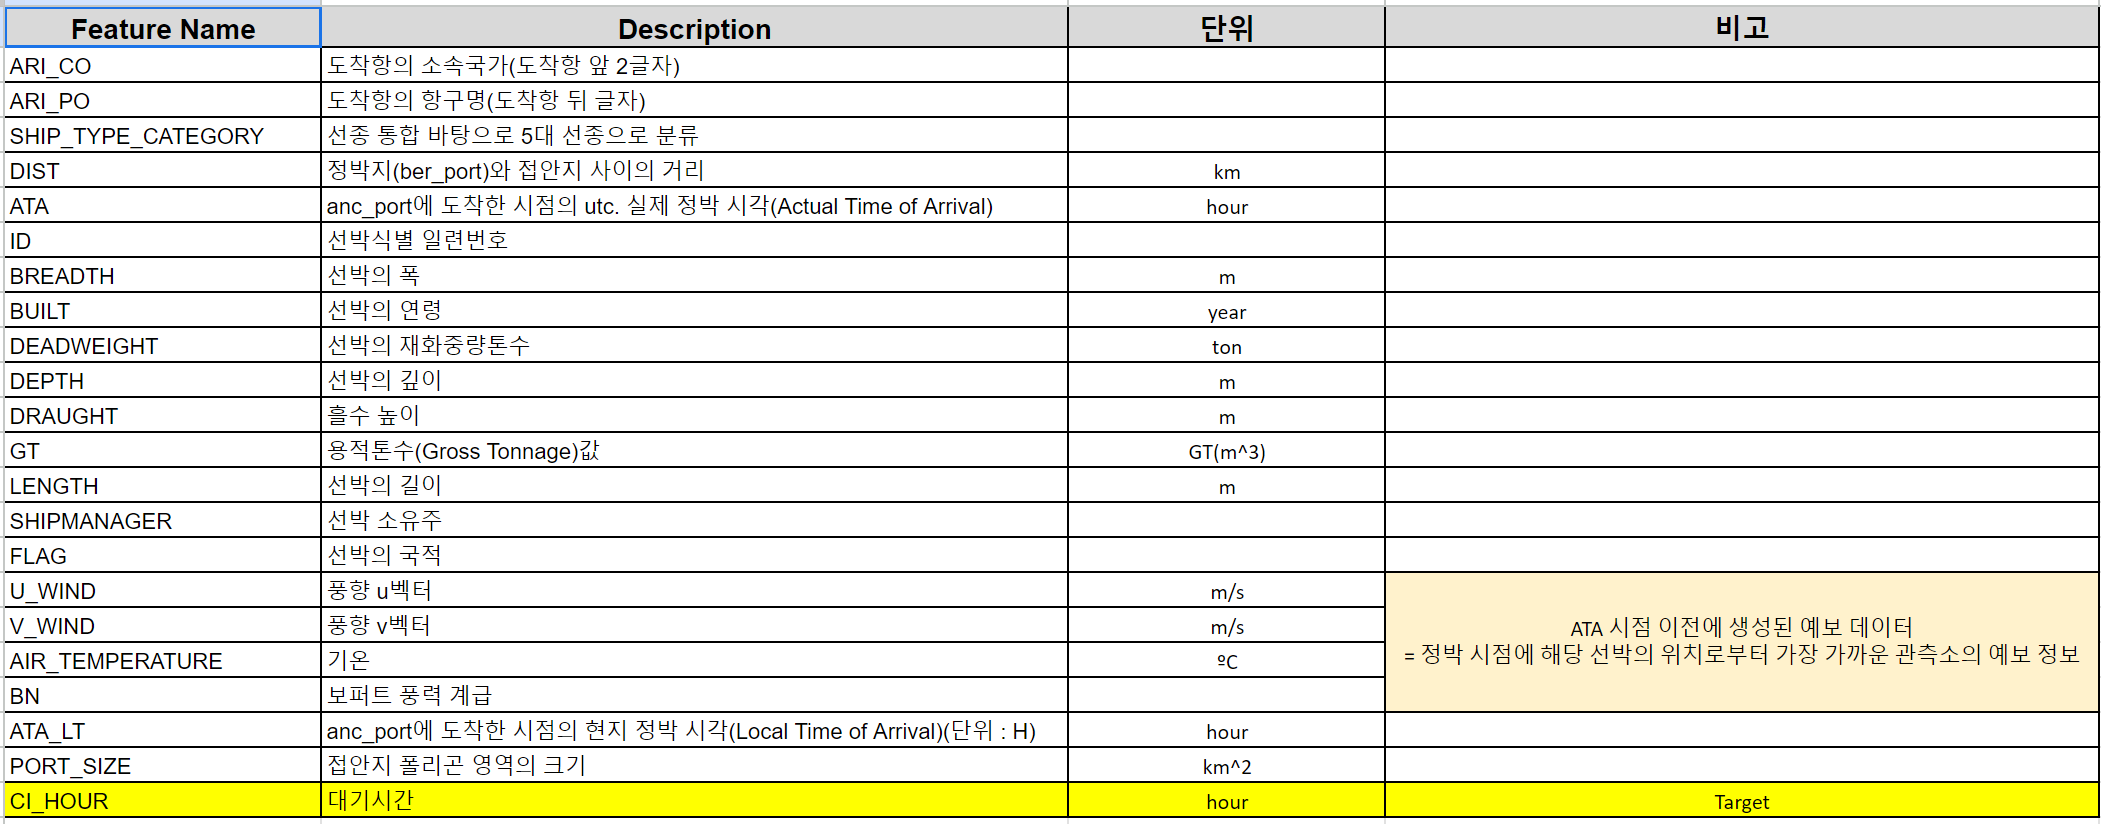

배 길이 대 폭 비율 (Length to Beam Ratio):
배 길이 대 폭 비율 = 선박의 길이 / 선박의 폭

배의 깊이 대 흘수 높이 비율 (Depth to Draft Ratio):
배의 깊이 대 흘수 높이 비율 = 선박의 깊이 / 흘수 높이

용적톤수 대 재화중량톤수 비율 (Gross Tonnage to Deadweight Ratio):
용적톤수 대 재화중량톤수 비율 = 용적톤수 / 선박의 재화중량톤수

배 길이 대 배의 깊이 비율 (Length to Depth Ratio):
배 길이 대 배의 깊이 비율 = 선박의 길이 / 선박의 깊이

용적톤수 대 선박의 폭 비율 (Gross Tonnage to Beam Ratio):
용적톤수 대 선박의 폭 비율 = 용적톤수 / 선박의 폭

In [335]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [336]:
file = "data/train.csv"
df = pd.read_csv(file)

In [337]:
df.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444


In [338]:
# 나라별 항구 수
df.groupby(['ARI_CO'])['ARI_PO'].nunique()

ARI_CO
AU    10
BR     4
CA     6
CL     1
CN    19
FI     1
ID     6
IN     6
JP    14
KR     4
LV     2
MY     2
MZ     2
PE     2
PH     1
QA     1
RU     9
SG     1
TT     1
TW     2
UA     2
US     3
VE     1
VN     3
ZA     1
Name: ARI_PO, dtype: int64

In [339]:
df.ATA = pd.to_datetime(df.ATA)
df['year'] = df.ATA.dt.year
df['month'] = df.ATA.dt.month
df['day'] =df.ATA.dt.day
df['dow'] =df.ATA.dt.day_of_week
df['hour'] =df.ATA.dt.hour
df.drop('ATA', axis=1, inplace=True)

In [340]:
import numpy as np
cols = []
for column in df.columns:
    if type(df[column][0]) != str:
        # print(column, df[column][0], type(df[column][0]), sep='\t')
        print(column)
        cols.append(column)

DIST
BREADTH
BUILT
DEADWEIGHT
DEPTH
DRAUGHT
GT
LENGTH
U_WIND
V_WIND
AIR_TEMPERATURE
BN
ATA_LT
PORT_SIZE
CI_HOUR
year
month
day
dow
hour


"\n['BREADTH',\n 'DEADWEIGHT',\n 'DEPTH',\n 'DRAUGHT',\n 'GT',\n 'LENGTH']\n \n위 column 간의 연관이 깊음 이들을 통합해서 새로운 하나의 feature로 만드는 것이 좋을 듯 -> 비율로 feature 생성\n "

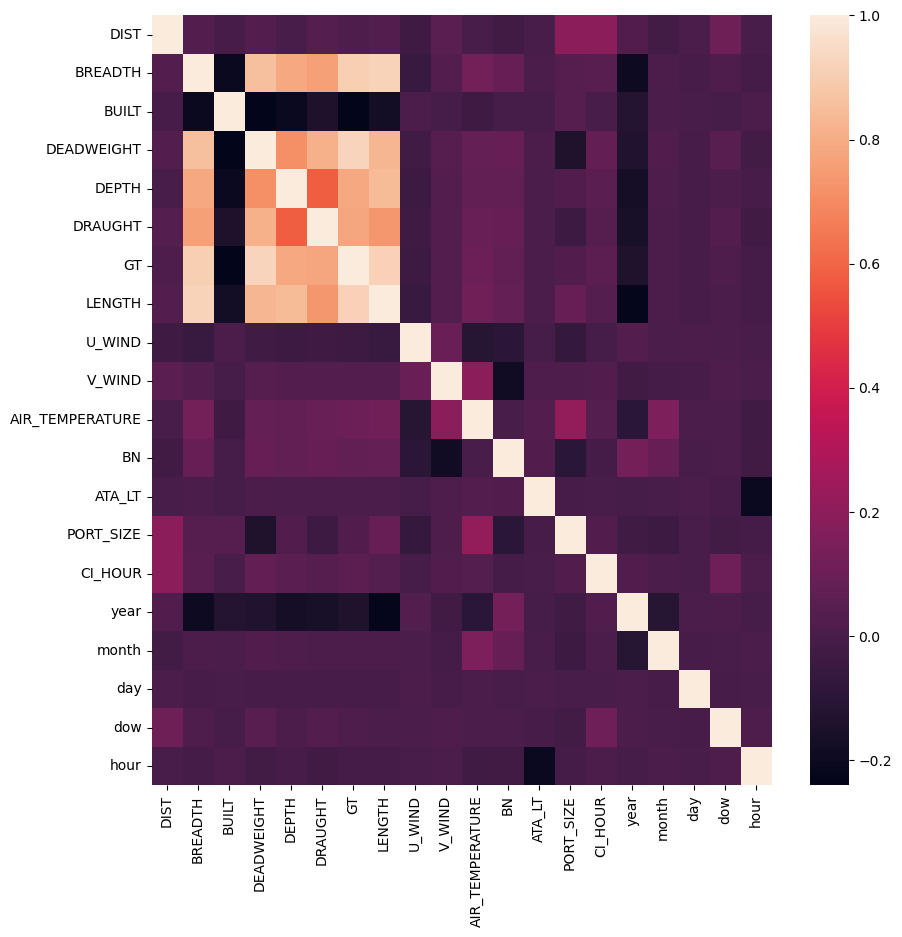

In [341]:


plt.figure(figsize=(10, 10))
sns.heatmap(df.loc[:, cols].corr())

'''
['BREADTH',
 'DEADWEIGHT',
 'DEPTH',
 'DRAUGHT',
 'GT',
 'LENGTH']
 
위 column 간의 연관이 깊음 이들을 통합해서 새로운 하나의 feature로 만드는 것이 좋을 듯 -> 비율로 feature 생성
 '''

배 길이 대 폭 비율 (Length to Beam Ratio):
배 길이 대 폭 비율 = 선박의 길이 / 선박의 폭

배의 깊이 대 흘수 높이 비율 (Depth to Draft Ratio):
배의 깊이 대 흘수 높이 비율 = 선박의 깊이 / 흘수 높이

용적톤수 대 재화중량톤수 비율 (Gross Tonnage to Deadweight Ratio):
용적톤수 대 재화중량톤수 비율 = 용적톤수 / 선박의 재화중량톤수

배 길이 대 배의 깊이 비율 (Length to Depth Ratio):
배 길이 대 배의 깊이 비율 = 선박의 길이 / 선박의 깊이

용적톤수 대 선박의 폭 비율 (Gross Tonnage to Beam Ratio):
용적톤수 대 선박의 폭 비율 = 용적톤수 / 선박의 폭

In [342]:
# LBR = LENGTH / BREADTH
df['LBD'] = df.LENGTH.div(df.BREADTH)

# DDR = DEPTH / DRAUGHT
df['DDR'] = df.DEPTH.div(df.DRAUGHT)

# GTDR = GT / DEADWEIGHT
df['GTDR'] = df.GT.div(df.DEADWEIGHT)

# LDT = LENGTH / DEPTH
df['LDT'] = df.LENGTH.div(df.DEPTH)

# GTBR = GT / BREADTH
df['GTBR'] = df.GT.div(df.BREADTH)

original_cols = ['BREADTH', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH']
ratio_cols = ['LBD', 'DDR', 'GTDR', 'LDT', 'GTBR']

[-1.62829273e-02 -1.21925634e-02  8.96272463e-05  3.69686924e-04
  1.75595165e-03  4.28636469e-03  7.47378518e-03  1.74154755e-02
  2.06349761e-02  2.12527961e-02  3.53344281e-02  3.58267895e-02
  4.03086947e-02  4.37114215e-02  5.17597012e-02  5.96614513e-02
  7.79538557e-02  1.11632010e-01  1.89145247e-01]


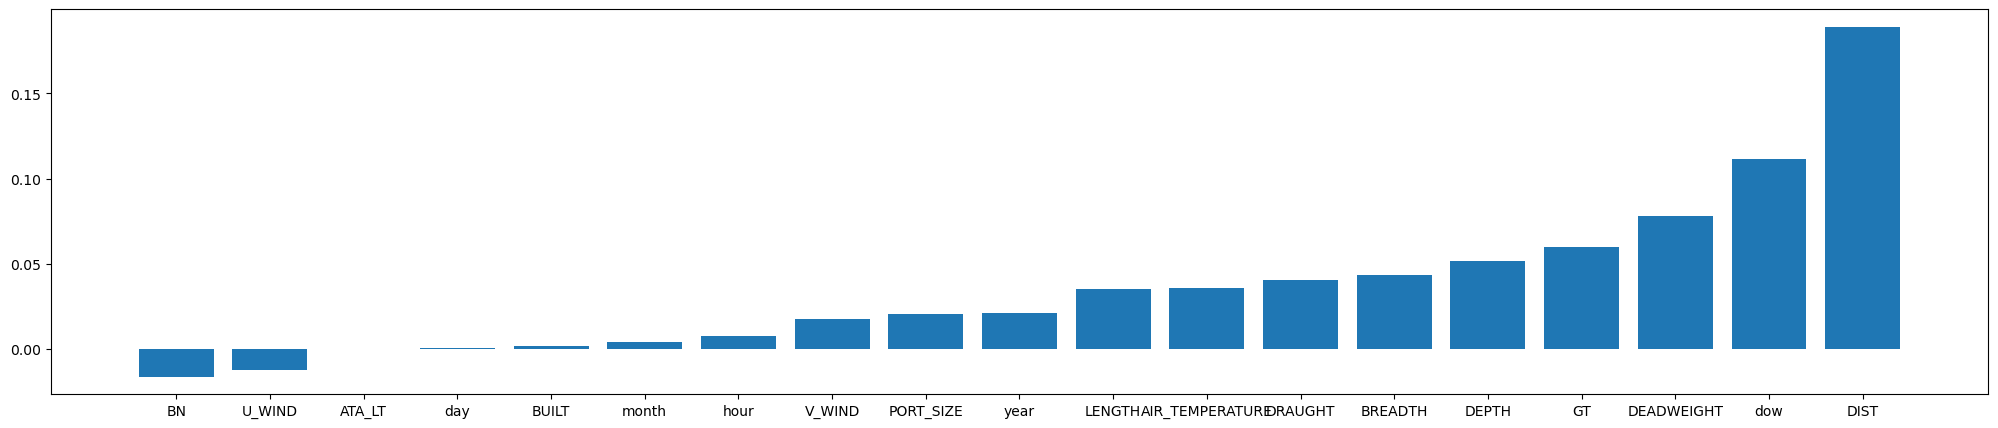

In [343]:
corr = df.loc[:, cols].corr().CI_HOUR.sort_values()[:-1]
print(corr.values)
plt.figure(figsize=(25, 5))
plt.bar(corr.keys(), corr.values)
# plt.xticks(range(len(corr)), corr.keys())
# plt.yscale('log')
# plt.ylim([0, 0.1])
plt.show()

In [344]:
# df['ARI_COPO'] = [co + po for co, po in zip(df.ARI_CO, df.ARI_PO)]
# df.drop(['ARI_CO', 'ARI_PO'], axis=1, inplace=True)
# df.head()

In [345]:
cate_cols = ['ARI_COPO', 'SHIP_TYPE_CATEGORY', 'FLAG']

In [346]:
df.to_csv("data/preproc1.csv", index=False)
pd.read_csv("data/preproc1.csv")

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,year,month,day,dow,hour,LBD,DDR,GTDR,LDT,GTBR
0,TRAIN_000000,SG,GIW5,Container,30.881018,Z618338,30.0,24,24300,10.0,...,2018,12,17,0,21,6.000000,1.0,0.687243,18.000000,556.666667
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,X886125,30.0,13,35900,10.0,...,2014,9,23,1,6,6.000000,1.0,0.654596,18.000000,783.333333
2,TRAIN_000002,CN,EUC8,Container,0.000000,T674582,50.0,12,146000,30.0,...,2015,2,3,1,22,7.400000,1.5,0.958904,12.333333,2800.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,Y847238,20.0,18,6910,10.0,...,2020,1,17,4,4,6.000000,1.0,0.781476,12.000000,270.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,A872328,50.0,10,116000,20.0,...,2020,1,26,6,7,6.000000,2.0,0.832759,15.000000,1932.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391934,TRAIN_391934,JP,QYY1,Container,0.000000,Y375615,20.0,27,6820,10.0,...,2017,6,6,1,5,5.500000,1.0,0.706745,11.000000,241.000000
391935,TRAIN_391935,SG,GIW5,Bulk,5.884603,K635567,10.0,12,3160,10.0,...,2019,10,16,2,0,8.000000,1.0,0.506329,8.000000,160.000000
391936,TRAIN_391936,US,QGN3,Bulk,70.660241,J284147,30.0,8,60300,20.0,...,2021,3,23,1,22,6.666667,2.0,0.577114,10.000000,1160.000000
391937,TRAIN_391937,TW,JWI3,Container,9.448179,J644215,30.0,29,23800,10.0,...,2015,1,8,3,7,5.666667,1.0,0.710084,17.000000,563.333333


In [347]:
df = pd.get_dummies(df, prefix='ship', columns=['SHIP_TYPE_CATEGORY'])
df = df[['SAMPLE_ID', 'ARI_CO', 'ARI_PO', 'DIST', 'year', 'month', 'day', 'dow', 'hour', 'ID', 'BREADTH', 'BUILT',
       'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH', 'LBD', 'DDR', 'GTDR',
       'LDT', 'GTBR', 'SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND',
       'AIR_TEMPERATURE', 'BN', 'ATA_LT', 'PORT_SIZE', 'ship_Bulk',
       'ship_Cargo', 'ship_Container', 'ship_Tanker',
       'CI_HOUR'
       ]]

In [348]:
df['ship_Bulk'] = df['ship_Bulk'].astype(int) 
df['ship_Cargo'] = df['ship_Cargo'].astype(int) 
df['ship_Container'] = df['ship_Container'].astype(int) 
df['ship_Tanker'] = df['ship_Tanker'].astype(int) 

In [349]:
df

,SAMPLE_ID,ARI_CO,ARI_PO,DIST,year,month,day,dow,hour,ID,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,ship_Bulk,ship_Cargo,ship_Container,ship_Tanker,CI_HOUR
0,TRAIN_000000,SG,GIW5,30.881018,2018,12,17,0,21,Z618338,...,NaN,NaN,NaN,5,0.002615,0,0,1,0,3.450000
1,TRAIN_000001,IN,UJM2,0.000000,2014,9,23,1,6,X886125,...,NaN,NaN,NaN,12,0.000217,1,0,0,0,0.000000
2,TRAIN_000002,CN,EUC8,0.000000,2015,2,3,1,22,T674582,...,NaN,NaN,NaN,6,0.001614,0,0,1,0,0.000000
3,TRAIN_000003,JP,ZAG4,0.000000,2020,1,17,4,4,Y847238,...,-1.61,6.7,2.629350,13,0.000356,0,0,1,0,0.000000
4,TRAIN_000004,SG,GIW5,27.037650,2020,1,26,6,7,A872328,...,-3.28,25.6,2.495953,15,0.002615,0,0,1,0,253.554444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391934,TRAIN_391934,JP,QYY1,0.000000,2017,6,6,1,5,Y375615,...,NaN,NaN,NaN,14,0.000552,0,0,1,0,0.000000
391935,TRAIN_391935,SG,GIW5,5.884603,2019,10,16,2,0,K635567,...,0.97,27.3,1.253491,8,0.002615,1,0,0,0,144.061389
391936,TRAIN_391936,US,QGN3,70.660241,2021,3,23,1,22,J284147,...,7.99,21.1,4.766257,18,0.000155,1,0,0,0,41.482222
391937,TRAIN_391937,TW,JWI3,9.448179,2015,1,8,3,7,J644215,...,NaN,NaN,NaN,15,0.000990,0,0,1,0,7.485278


In [350]:
remove_cols = ['SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN', 'ID', 'DDR', 'LDT']
df.drop(remove_cols, axis=1).to_csv("data/preproc1_onehot_rm.csv", index=False)
df.drop(remove_cols + ratio_cols, axis=1).to_csv("data/preproc1_onehot_origin_rm.csv", index=False)
df.drop(remove_cols + original_cols, axis=1).to_csv("data/preproc1_onehot_ratio_rm.csv", index=False)

In [351]:
df.isna().sum()

SAMPLE_ID               0
ARI_CO                  0
ARI_PO                  0
DIST                    0
year                    0
month                   0
day                     0
dow                     0
hour                    0
ID                      0
BREADTH                 1
BUILT                   0
DEADWEIGHT              0
DEPTH                   1
DRAUGHT                 1
GT                      0
LENGTH                  1
LBD                     1
DDR                  5514
GTDR                    0
LDT                     1
GTBR                    1
SHIPMANAGER             0
FLAG                    0
U_WIND             163688
V_WIND             163688
AIR_TEMPERATURE    164630
BN                 163688
ATA_LT                  0
PORT_SIZE               0
ship_Bulk               0
ship_Cargo              0
ship_Container          0
ship_Tanker             0
CI_HOUR                 0
dtype: int64